# IMPORT MODULES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("weight-height.csv")
data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [2]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [4]:
HQ1=data.Height.quantile(0.25)
HQ3=data.Height.quantile(0.75)
HQ1,HQ3

(63.505620481218955, 69.1742617268347)

In [5]:
HIQR= HQ3-HQ1
HIQR

5.668641245615746

In [6]:
lower_limit_height = HQ1 - 1.5*HIQR
upper_limit_height = HQ3 + 1.5*HIQR
lower_limit_height,upper_limit_height

(55.00265861279534, 77.67722359525831)

In [7]:
outlier=data[(data.Height<lower_limit_height)|(data.Height>upper_limit_height)]
outlier

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


In [8]:
correct_height_data=data[(data.Height>lower_limit_height)&(data.Height<upper_limit_height)]
correct_height_data


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [9]:
WQ1=data.Weight.quantile(0.25)
WQ3=data.Weight.quantile(0.75)
WQ1,WQ3

(135.8180513055015, 187.16952486868348)

In [10]:
WIQR= WQ3-WQ1
WIQR

51.35147356318197

In [11]:
lower_limit_weight = WQ1 - 1.5*WIQR
upper_limit_weight = WQ3 + 1.5*WIQR
lower_limit_weight,upper_limit_weight

(58.79084096072856, 264.19673521345646)

In [12]:
correct_weight_data=data[(data.Weight>lower_limit_weight)&(data.Weight<upper_limit_weight)]
correct_weight_data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


Text(0.5, 0, 'Height')

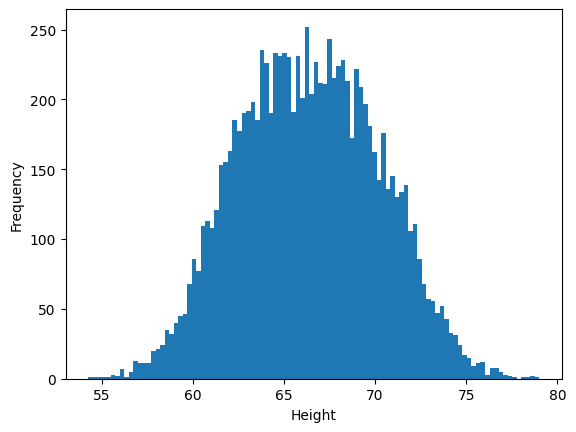

In [13]:
data['Height'].plot(kind='hist', bins=100)
plt.xlabel('Height')

Text(0.5, 0, 'Weight')

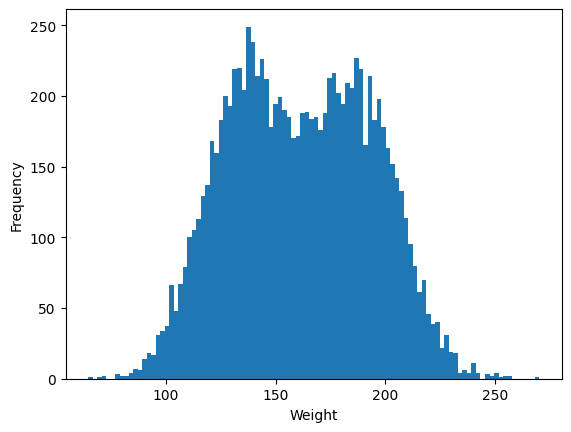

In [14]:
data['Weight'].plot(kind='hist', bins=100)
plt.xlabel('Weight')

Text(0.5, 0, 'outlier')

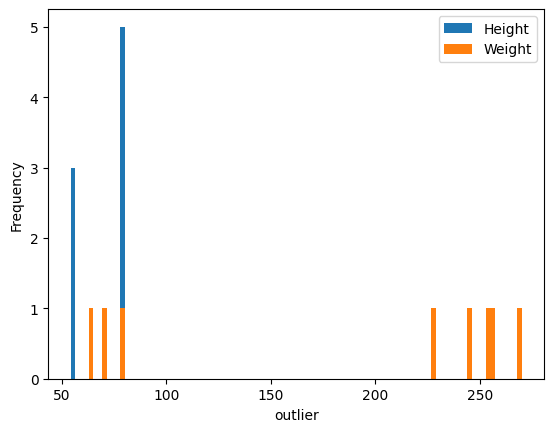

In [15]:
outlier.plot(kind='hist', bins=100)
plt.xlabel('outlier')


In [16]:
top=data.head(8)
top

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110


In [17]:
bottom=data.tail(8)
bottom

,Gender,Height,Weight
9992,Female,62.077832,138.691680
9993,Female,60.030434,97.687432
9994,Female,59.098250,110.529686
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


<Axes: >

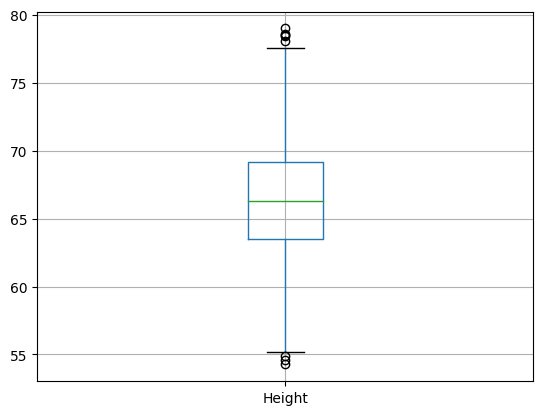

In [18]:
data.boxplot(column="Height")

<Axes: >

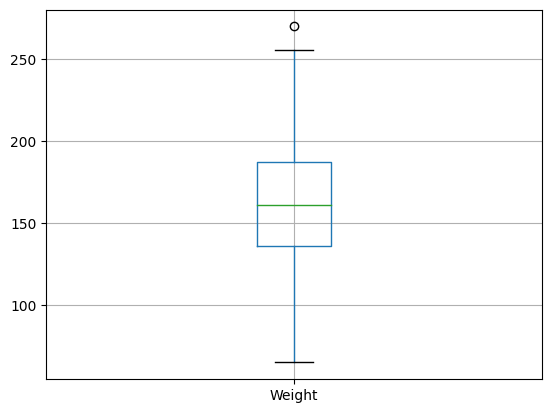

In [19]:
data.boxplot(column="Weight")

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [22]:
X=data.drop(columns=['Gender'])
Y=data['Gender']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

In [23]:
model=LogisticRegression()
model.fit(x_train,y_train)
print("Logistic Regression Accuracy: ",model.score(x_test,y_test)*100)

Logistic Regression Accuracy:  91.7


In [24]:
model=KNeighborsClassifier()
model.fit(x_train.values,y_train.values)
print("KNeighbors Classifier Accuracy: ",model.score(x_test,y_test)*100)

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


KNeighbors Classifier Accuracy:  90.43333333333334


In [25]:
model.fit(x_train.values,y_train.values)

KNeighborsClassifier()

In [26]:
model= DecisionTreeClassifier()
model.fit(x_train,y_train)
print("Decision Tree Accuracy: ",model.score(x_test,y_test)*100)

Decision Tree Accuracy:  87.33333333333333
